In [32]:
import typing as t
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as ds
from sklearn import svm
from random import choice

In [8]:
X, y = ds.make_blobs(100, 2, centers=2)
n_examples, n_features = X.shape
n_examples, n_features

(100, 2)

In [12]:
def plot_decision_function(classifier, axis, title):
    # plot the decision function
    xx, yy = np.meshgrid(np.linspace(X[:,0].min(),
                                     X[:,0].max(), 500),
                         np.linspace(X[:,1].min(), 
                                     X[:,1].max(), 500))
    Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # plot the line, the points, and the nearest vectors to the plane
    axis.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.bone)
    axis.scatter(X[:, 0], X[:, 1], c=y, alpha=0.9, cmap=plt.cm.bone, edgecolors='black')
    axis.set_title(title)

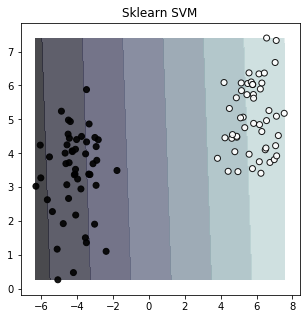

In [13]:
model = svm.SVC(kernel="linear").fit(X, y)
fig, ax = plt.subplots(1,1,figsize=(5, 5))
plot_decision_function(model, ax, "Sklearn SVM")

In [46]:
def SMO(C: float,
        tolerance: float,
        max_passes: int,
        X, y,
        kernel: t.Callable = None
        ) -> t.Tuple[t.Sequence, float]:
    """Perform SVM classification based on the Sequential Minimal Optimization
    algorithm presented here: http://cs229.stanford.edu/materials/smo.pdf
    
    The broad stroke of the algorithm is as follows:
     - SMO is a linear classifier that predicts:
         1 if 0 < (w.T @ x + b) else -1
       or alternately:
         0 if 0 < (sum_{i=1}^{m} ⍺_i * y^i * dot(x^i, x)) else -1
       where we can substitute the dot product for any other kernel, e.g. RBF 
     - Solve max_⍺ for the dual-form✝:
       W(⍺) = sum_{i=1}^{m} ⍺_i - (1/2) [ sum_{i=1}^{m} sum_{j=1}^{m}   ⍺_i * ⍺_j * y^i y^j * dot(x^i, x^j)]
     - Subject to:
       - 0 <= ⍺_i <= C for all i = {1, ..., m}
       - sum_{i=1}^{m} ⍺_i y^i = 0

    ✝ look into this
    
    Arguments:
        C: regulatization parameter
        tolerance: equality tolerance with floating point precision
        max_passes: number of iterations to perform without ⍺'s
            changing before terminating
        X, y: training data
    Returns:
        𝞪: lagrange multipliers for solution
        b: threshold for solution 
    """
    if kernel is None:
        kernel = np.dot
    n_examples, _ = X.shape
    
    𝞪 = np.zeros(n_examples)
    b = 0
    
    def lin_classifier(x: np.ndarray):
        """f(x) = w.T@X + b expressed using lagrange multipliers"""
        # need to look into how this derived from w.T@x + b
        return (np.multiply(𝞪, y)*kernel(X, x)).sum()
        # return sum(
        #     𝞪[i]*y[i]* kernel(X[i], x) for i in range(n_examples
        # )
        
    passes = 0
    while passes < max_passes:
        E = lin_classifier(X) - y
        assert E.shape == y.shape
        for i in range(n_examples):
            𝞪_i_old = 𝞪[i]
            if ((y[i]*E[i] < -tolerance) and (𝞪[i] < C)) \
            or ((y[i]*E[i] > tolerance)  and (𝞪[i] < C)):
                j = i
                while j == i:
                    j = choice(range(n_examples))
                𝞪_j_old = 𝞪[j]
                if y[i] == y[j]:
                    L = max(0, 𝞪[j] - 𝞪[i])
                    H = min(C, C + 𝞪[j] - 𝞪[i])
                else:
                    L = max(0, 𝞪[i] + 𝞪[j] - C)
                    H = min(C, 𝞪[i] + 𝞪[j])
                if L == H:
                    continue
                else:
                    η = 2*kernel(x[i], x[j]) \
                        - kernel(x[i], x[i]) \
                        - kernel(x[j], x[j])
                    if 0 <= η:
                        continue
                    else:
                        𝞪[j] -= (E[i] - E[j]) / η
                        if H < 𝞪[j]:
                            𝞪[j] = H
                        elif 𝞪[j] < L:
                            𝞪[j] = L
                        if abs(𝞪[j] - 𝞪_j_old) < 1e-5;
                            continue
                        else:
                            𝞪[i] += y[i]*y[j]*(𝞪_j_old-𝞪_j)
                            # eq 17
                            b1 = b \
                               - E[i] \
                               - y[i]*(𝞪[i]-𝞪_i_old)*kernel(x[i],x[i]) 
                               - y[j]*(𝞪[j]-𝞪_j_old)
                            b2 = # eq 18
                    
                    
                    
    raise NotImplementedError